In [ ]:
!pip install google_images_download
!pip install icrawler

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 20.4 MB/s eta 0:00:00
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14538 sha256=8db0c2b775924f8d2610c1eec5e3306b4f93a821167b37728939be78315f83eb
  Stored in directory: /root/.cache/pip/wheels/dc/83/37/7303b15f3e8a5bfbd5c7ebbfe13f0c666ada6f8efecc6d77ec
Successfully built google_images_download


In [22]:
from icrawler.builtin import GoogleImageCrawler

styles = ['Dravidian temple architecture', 'Nagara temple architecture',
          'Vesara temple architecture', 'Kalinga temple architecture']
folder_names = ['dravidian', 'nagara', 'vesara', 'kalinga']

for style, folder in zip(styles, folder_names):
    crawler = GoogleImageCrawler(storage={'root_dir': f'temple_data/{folder}'})
    crawler.crawl(keyword=style, max_num=500)
!pip install split-folders
import splitfolders

splitfolders.ratio("temple_data", output="temple_dataset", seed=1337, ratio=(.7, .2, .1))

ERROR:downloader:Response status code 404, file https://i0.wp.com/iasnext.com/wp-content/uploads/2023/05/Classification-of-Forest-4.jpg
Exception in thread parser-001:
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/icrawler/parser.py", line 93, in worker_exec
    for task in self.parse(response, **kwargs):
TypeError: 'NoneType' object is not iterable
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/467437354/photo/the-1300-year-old-kailasanathar-hindu-temple-built-by-the-pallava-king-narasimhavarman-ii.jpg
ERROR:downloader:Response status code 400, file https://media.gettyimages.com/id/950348796/video/kapaleeswarar-hindu-temple-dolly-shot-steadicam-walking-motion.jpg
ERROR:downloader:Response status code 404, file https://i0.wp

Copying files: 391 files [00:03, 109.67 files/s]


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "temple_dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    "temple_dataset/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    "temple_dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 272 images belonging to 4 classes.
Found 77 images belonging to 4 classes.
Found 42 images belonging to 4 classes.


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step - accuracy: 0.2903 - loss: 1.6307 - val_accuracy: 0.3247 - val_loss: 1.3396
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.4446 - loss: 1.2095 - val_accuracy: 0.5065 - val_loss: 1.1371
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.6458 - loss: 0.9471 - val_accuracy: 0.5584 - val_loss: 1.0765
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6599 - loss: 0.8594 - val_accuracy: 0.5844 - val_loss: 1.0820
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7155 - loss: 0.8426 - val_accuracy: 0.5325 - val_loss: 1.1186
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7904 - loss: 0.6110 - val_accuracy: 0.6494 - val_loss: 1.0806
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7151 - loss: 0.6694 - val_accuracy: 0.5974 - val_loss: 1.1199
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.7824 - loss: 0.6387 - val_accuracy: 0.6104 - val_loss: 1.0710
Epoch 9/10
9/9 ━━━━

In [27]:
loss, acc = model.evaluate(test_generator)
print("Test accuracy:", acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step - accuracy: 0.6314 - loss: 1.1178
Test accuracy: 0.6190476417541504


In [28]:
!pip install opencv-python matplotlib

In [29]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = "temple_data"
img_size = 224  # Resize all images to 224x224

X = []
y = []

label_map = {
    "dravidian": 0,
    "nagara": 1,
    "vesara": 2,
    "kalinga": 3
}

# Load and process images
for label_name in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_name)
    if not os.path.isdir(label_path):
        continue

    label = label_map[label_name]

    for img_file in os.listdir(label_path):
        img_path = os.path.join(label_path, img_file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)
        except:
            continue  # Skip any unreadable image

X = np.array(X)
y = np.array(y)

print("Total images loaded:", len(X))

from PIL import Image

def clean_image_folder(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            path = os.path.join(root, file)
            try:
                with Image.open(path) as img:
                    img.verify()
                    if img.size[0] < 100 or img.size[1] < 100:
                        os.remove(path)
            except:
                os.remove(path)

for folder in folder_names:
    clean_image_folder(f'temple_data/{folder}')


Total images loaded: 391


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (312, 224, 224, 3)
Test set: (79, 224, 224, 3)


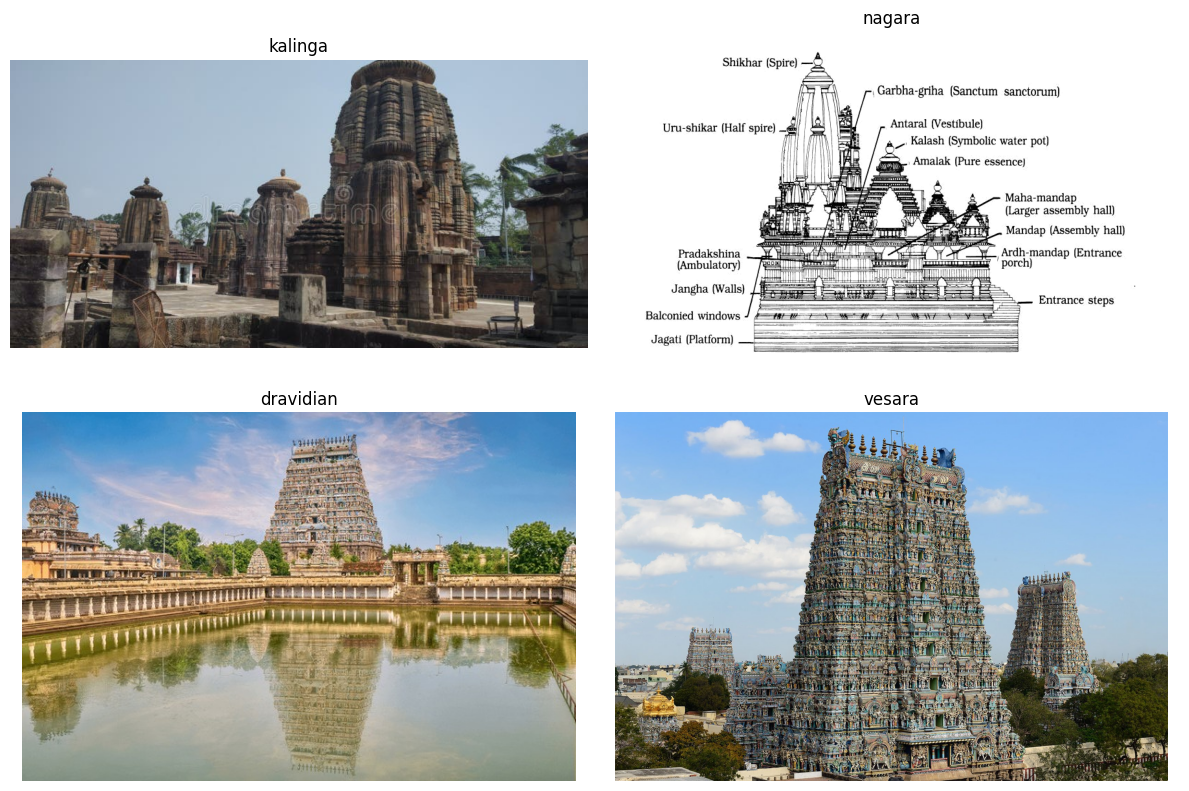

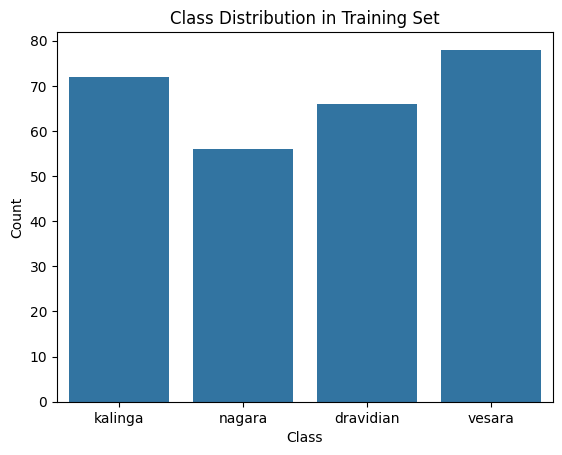

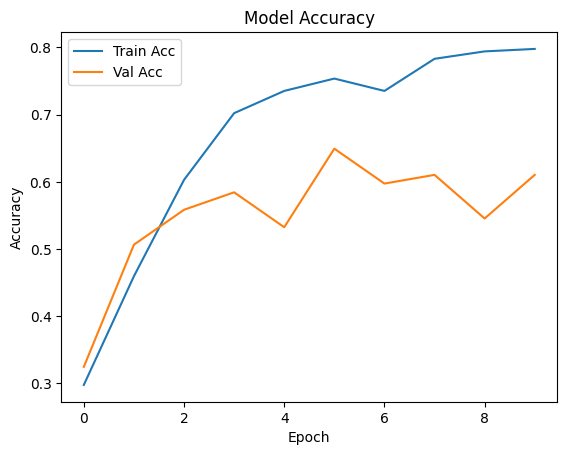

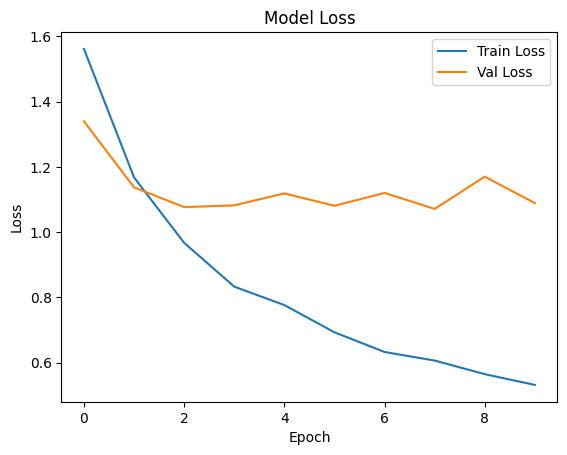

In [32]:
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg

base_dir = 'temple_dataset/train'  # corrected path

classes = os.listdir(base_dir)

plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    img_folder = os.path.join(base_dir, cls)
    img_file = random.choice(os.listdir(img_folder))
    img_path = os.path.join(img_folder, img_file)

    img = mpimg.imread(img_path)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd

class_counts = {}

for cls in classes:
    class_counts[cls] = len(os.listdir(os.path.join(base_dir, cls)))

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

sns.barplot(data=df, x='Class', y='Count')
plt.title("Class Distribution in Training Set")
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: dravidian


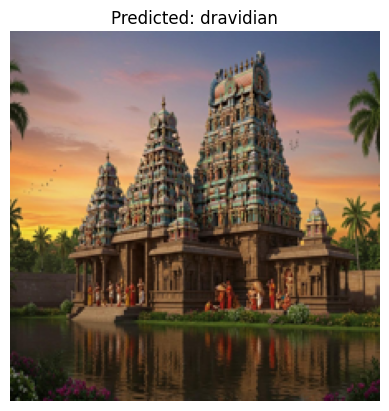

In [33]:
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing import image

# Download the image from the web
url = "https://www.poojn.in/wp-content/uploads/2025/03/Dravidian-Temple-Architecture-A-Detailed-Guide.jpeg.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).resize((224, 224)).convert('RGB')

# Preprocess the image
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Class labels (must match your `label_map`)
class_labels = ['dravidian', 'nagara', 'vesara', 'kalinga']
print("Predicted Class:", class_labels[predicted_class])

# Show the image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()
